<Structure id=protein>
550


[]

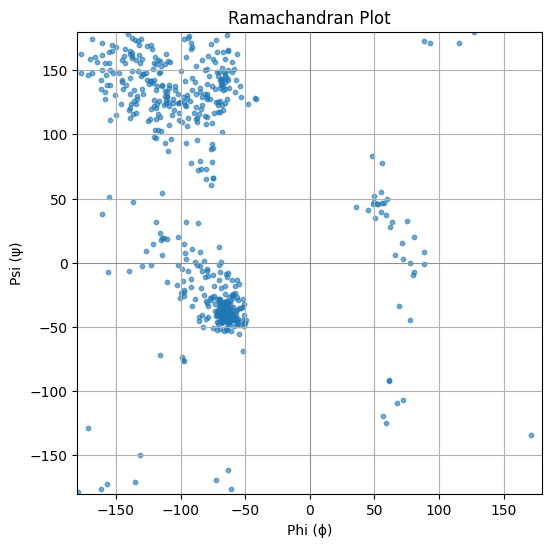

In [3]:
from Bio.PDB import PDBParser, PPBuilder
from Bio.PDB import MMCIFParser

import matplotlib.pyplot as plt
import math

# Load structure from PDB file
parser = PDBParser(QUIET=True)
#parser = MMCIFParser(QUIET=True)
name = "4daa"
structure = parser.get_structure("protein", "dades/"+name +".pdb")
#structure = parser.get_structure("protein", "dades/"+ name+ ".cif")
#Extract phi and psi angles
phi_psi = []
ppb = PPBuilder()
print(structure)
for model in structure:
    for chain in model:
        for poly_index, poly in enumerate(ppb.build_peptides(chain)):
            phi_psi_angles = poly.get_phi_psi_list()
            for res, angles in zip(poly, phi_psi_angles):
                phi, psi = angles
                if phi and psi:
                    phi_psi.append((math.degrees(phi), math.degrees(psi)))

# Plot Ramachandran plot
print(len(phi_psi))
phi_vals, psi_vals = zip(*phi_psi)

plt.figure(figsize=(6, 6))
plt.scatter(phi_vals, psi_vals, s=10, alpha=0.6)
plt.xlim(-180, 180)
plt.ylim(-180, 180) 
plt.xlabel("Phi (ϕ)")
plt.ylabel("Psi (ψ)")
plt.title("Ramachandran Plot")
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.savefig("ramachandras/"+ name+".pdf")
plt.plot()


In [17]:
from MDAnalysis.analysis.dssp import DSSP
import MDAnalysis as mda
u = mda.Universe("dades/"+name +".pdb")
s = ''.join(DSSP(u).run().results.dssp[0])
print(s)

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/analysis/base.py:522: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[idx] = ts.time


-HHHHHHHHHHHHHHHHHHHHHHHHHH----HHHHHHHHHHHHHHHHHH----HHHH--HHHHHHHH-----HHHHHH----HHHHHHHHHHHHHHHHHH--HHHHHHHHHHHHH---HHHHHHHHHHHHHHHH----HHHHHHHHHHHHHHHHHHHHH------E---------E-HHHHHHHHHHHHHHHHHH-------HHHHHHHHHHHHH---------HHHHHHHHHHHHHHHHHHHHHHHHHHH--------HHHHHHHHHHH-HHHHHHHHHHHHHH-----HHHHHHHHHHHHHHHHHH---------HHHHH------HHHHHHHHHHHHHH-E---HHHHHHH------------E---HHHHHHH--HHHHHHHHHHHHHHHHHHHH-HHHHHHHHHHHHHH--HHHHHHHHHHHHHHHH----HHHHHHHHHHHHHHHHHHH---HHHHHHHHHHH-------HHH-HHHHHHHHH----HHHHHHHHHHHHHHHHHHHHHHHH-HHHHH--------HHHHHHHHH-


In [29]:
import freesasa

structure = freesasa.Structure("dades/4qry_AA.pdb")
result = freesasa.calc(structure)

print("Total SASA:", result.totalArea())

structure = freesasa.Structure("dades/4qry_x1_model.pdb")
result = freesasa.calc(structure)
clasified= freesasa.classifyResults(result, structure, "res_name")
print("Total SASA:", result.totalArea())
print(clasified)


Total SASA: 11279.273876141986


AttributeError: 'str' object has no attribute 'classify'

In [28]:
freesasa.Classifier??

Docstring:     
Assigns class and radius to atom by residue and atom name.

Subclasses derived from :py:class:`.Classifier` can be used to define custom
atomic radii and/or classes. Can also be initialized from
config-files_ with a custom classifier.

If initialized without arguments the default classifier is used.

Derived classifiers must set the member :py:attr:`.purePython` to ``True``

Residue names should be of the format ``"ALA"``, ``"ARG"``, etc.
Atom names should be of the format ``"CA"``, ``"N"``, etc.
Init docstring:
Constructor.

If no file is provided the default classifier is used.

Args:
    fileName (str): Name of file with classifier configuration.

Raises:
    IOError:   Problem opening/reading file
    Exception: Problem parsing provided configuration or
               initializing defaults
File:           ~/myenv/TFGenv/lib/python3.13/site-packages/freesasa.cpython-313-darwin.so
Type:           type
Subclasses:     

In [2]:
import freesasa

# Load your structure
structure = freesasa.Structure("dades/4qry_AA.pdb")

# Load classification from config
classifier = freesasa.Classifier("polar_nonpolar.config")

# Run SASA calculation
result = freesasa.calc(structure, classifier)

# Get areas
areas = result.classifiedAreas()
print(f"Polar SASA:    {areas['polar']:.2f} Å²")
print(f"Nonpolar SASA: {areas['nonpolar']:.2f} Å²")

FreeSASA: warning: input configuration lacks the entry 'name:', will use 'no-name-given'
FreeSASA:lib/src/classifier.c:364: error: input configuration lacks (at least) one of the entries 'types:' or 'atoms:'
FreeSASA:lib/src/classifier.c:845: error: 


Exception: Error parsing configuration in 'polar_nonpolar.config'.